# Model Selection, Auto-ARIMA, Forecasting, and Seasonality

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's load in the data we used last time, but this time, we won't subset to a certain year range. 

In [28]:
us_temp = pd.read_csv('../data/usa-annual-temp.csv')
us_temp.head()

,year,temp
0,1901,8.59
1,1902,8.39
2,1903,7.95
3,1904,8.09
4,1905,8.40


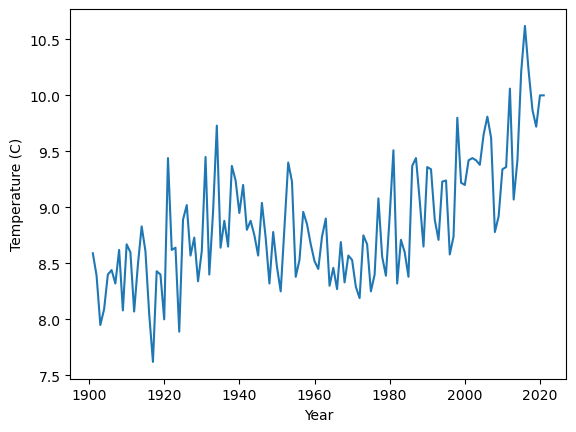

In [29]:
us_temp['year'] = pd.to_datetime(us_temp['year'], format='%Y')
us_temp = us_temp.set_index('year')

fig, ax = plt.subplots()
ax.plot(us_temp)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

Let's fit two different ARIMA models for our time series. 

In [74]:
from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(us_temp, order=(1,1,1)).fit()
model2 = ARIMA(us_temp, order=(2,1,0)).fit()

/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishm

There are several different metrics that we can use to differentiate which model is better.

Here we use mean squared error, AIC, and BIC, three such metrics. We want all of these to be smaller to optimize our model. 

In [76]:
print(model1.mse)
print(model2.mse)

0.762854260756056
0.7732445091960372


In [77]:
print(model1.aic)
print(model2.aic)

122.70509308447475
130.35647090262293


In [78]:
print(model1.bic)
print(model2.bic)

131.0675683128209
138.71894613096907


Using these metrics, we can fit many different ARIMA models with different number of AR, I, and MA terms.


In [38]:
ar = list(range(6))
i = list(range(6))
ma = list(range(6))

scores = {
    'combo':[],
    'aic':[]
}

for p in ar:
    for d in i:
        for q in ma:
            
            combo = str(p) + ','  + str(d) + ',' + str(q) 
            
            aic = ARIMA(us_temp, order = (p,d,q)).fit().aic
            
            scores['combo'].append(combo)
            scores['aic'].append(aic)

scores_df = pd.DataFrame(scores)

/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishm

In [39]:
scores_df.sort_values('aic')

,combo,aic
153,"4,1,3",114.366644
79,"2,1,1",115.253082
154,"4,1,4",115.666669
9,"0,1,3",115.751013
189,"5,1,3",115.972957
...,...,...
102,"2,5,0",518.766661
24,"0,4,0",544.977826
31,"0,5,1",548.091168
66,"1,5,0",589.431744


In [40]:
arima_413 = ARIMA(us_temp, order=(4,1,3)).fit()
arima_413.summary()

/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting au

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                  121
Model:                 ARIMA(4, 1, 3)   Log Likelihood                 -49.183
Date:                Sun, 23 Apr 2023   AIC                            114.367
Time:                        14:30:43   BIC                            136.667
Sample:                    01-01-1901   HQIC                           123.423
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4009      0.125    -11.210      0.000      -1.646      -1.156
ar.L2         -1.3365      0.219     -6.091      0.000      -1.767      -0.906
ar.L3         -0.5929      0.221     -2.687      0.007      -1.025      -0.160
ar.L4         -0.4233      0.118     -3.585      0.000      -0.655      -0.192
ma.L1          0.7675      0.130      5.906      0.000       0.513       1.022
ma.L2          0.0962      0.169      0.569      0.569      -0.235       0.428
ma.L3         -0.5959      0.116     -5.118      0.000      -0.824      -0.368
sigma2         0.1332      0.017      7.720      0.000       0.099       0.167
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 8.60
Prob(Q):                              0.91   Prob(JB):                         0.01
Heteroskedasticity (H):               1.06   Skew:                             0.61
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Our model can be used to predict future temperature values. This is called **forecasting**.

While we can predict any number of future points, it becomes more challenging to predict distant values. There is more and more uncertainty the further out we go. 

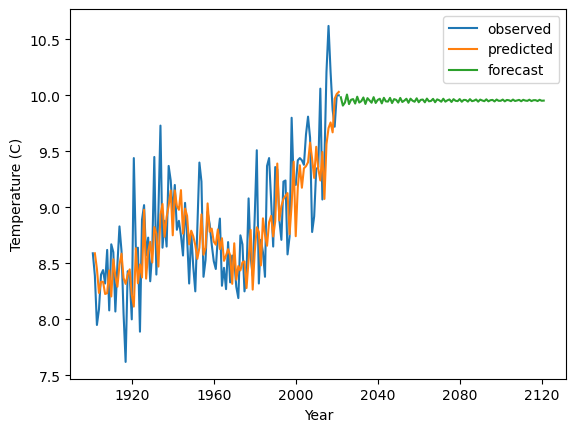

In [79]:
arima_forecast = arima_413.forecast(100)

fig, ax = plt.subplots()

ax.plot(us_temp, label='observed')
ax.plot(arima_413.predict()[1:], label='predicted')
ax.plot(arima_forecast, label='forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();

## Auto-ARIMA

A package called `pmdarima` has a function called `auto_arima()` that will pick the best ARIMA model automatically for us by minimizing these model fitting metrics. 

To install the `pmdarima` package, you can do one of the following:

GUI:

1) Open Anaconda Navigator
2) Click on Environments 
3) Make sure you click on 'base (root)'.
4) Click 'Channels', then 'Add...', and then type 'conda-forge' and hit enter.
5) Hit 'Update index...'
6) Change the drop-down menu from 'Installed' to 'Not-installed'.
7) Search for 'pmdarima'. Check it, and hit apply.

Command line

1) Go to Terminal or Git Bash.
2) Run 'conda activate'.
3) Run 'conda install -c conda-forge pmdarima'
4) Type 'y' and hit enter if you get asked a prompt.

After you do this, you will need to restart the Jupyter notebook and re-run.

When we run `auto-arima()`, it goes through various ARIMA models and fits each, then picks the best fitting model. 

Note you do not need to use `.fit()`.

In [44]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(us_temp['temp'])
auto_arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -52.100
Date:                Sun, 23 Apr 2023   AIC                            114.200
Time:                        14:30:44   BIC                            128.137
Sample:                    01-01-1901   HQIC                           119.860
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0183      0.010      1.792      0.073      -0.002       0.038
ar.L1          0.0152      0.117      0.130      0.896      -0.214       0.244
ar.L2         -0.3123      0.105     -2.982      0.003      -0.517      -0.107
ma.L1         -0.7249      0.094     -7.706      0.000      -0.909      -0.541
sigma2         0.1381      0.020      6.970      0.000       0.099       0.177
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.50
Prob(Q):                              0.97   Prob(JB):                         0.11
Heteroskedasticity (H):               0.90   Skew:                             0.47
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

To get predictions for our samples, we can use `.predict_in_sample()`.

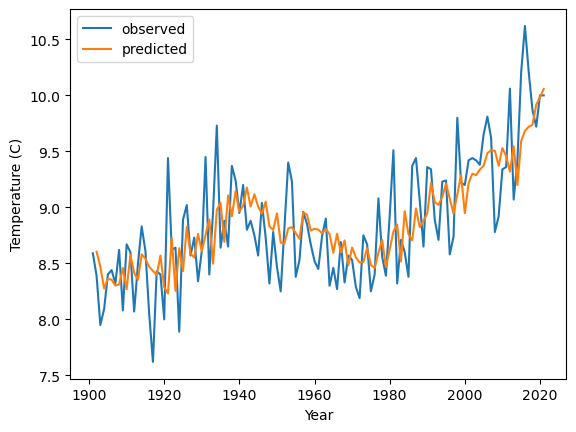

In [80]:
in_samp_pred = auto_arima_model.predict_in_sample()

fig, ax = plt.subplots()
ax.plot(us_temp, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();

With `auto_arima()`, you can do forecasts similarly to how you would with the statsmodels variant with `.predict()`. However, you can also easily visualize **confidence intervals**, essentially the margin of error for our forecasts.

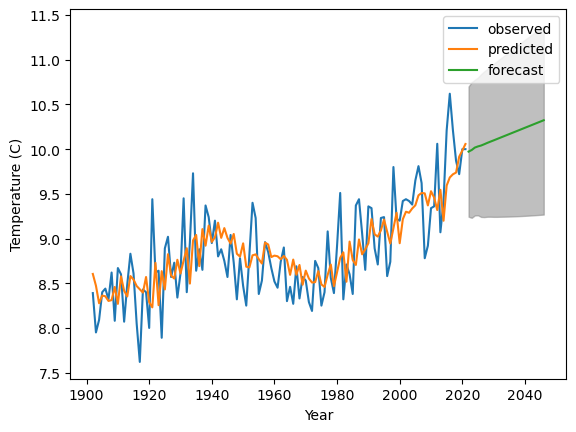

In [47]:
forecast, ci = auto_arima_model.predict(25, return_conf_int=True)

fig, ax = plt.subplots()
ax.plot(us_temp[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(forecast, label='forecast')
ax.fill_between(forecast.index, ci[:,0], ci[:,1], color = 'gray', alpha=0.5) # our confidence intervals
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
ax.legend();

## Seasonal data

Time series data is not always yearly; it can monthly, daily, hourly, or even more frequent. 

It is always important to consider the frequency of your data when working with time series.

Here, we are loading in monthly mean air temperatures from Stockholm, Sweden.

In [61]:
stockholm = pd.read_csv('../data/stockholm-monthly-temp.csv')
stockholm.head()

,date,temp
0,1756-01-01,-2.6
1,1757-01-01,-6.7
2,1758-01-01,-5.8
3,1759-01-01,-0.9
4,1760-01-01,-10.4


This is a very large time series, but we're only going to look at data starting in 1950.

In [62]:
stockholm['date'] = pd.to_datetime(stockholm['date'])
stockholm = stockholm.set_index('date').sort_index()
stockholm = stockholm.loc[stockholm.index >= '1950-1-1']
stockholm.head()

,temp
date,
1950-01-01,-4.4
1950-02-01,-1.0
1950-03-01,1.6
1950-04-01,5.9
1950-05-01,11.4


When we visualize our data, we can identify a very clear pattern: the temperature is going up and down very regularly. If you examine it, you'll notice it happens at the same time every year.

This is called **seasonality**, and it is when a time series exhibits a pattern at regular intervals.

Though it is called seasonality, the pattern does not have to occur with the seasons: it can occur monthly, or every 4 days. In our case, our seasonality occurs every 12 samples, since every 12 samples will be the same month. 

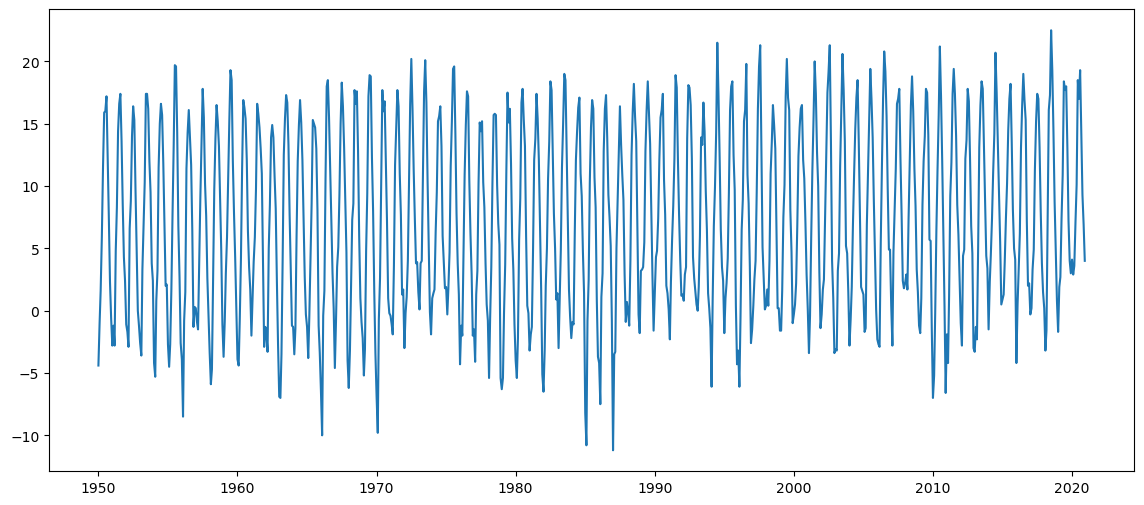

In [64]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(stockholm)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)');

To see this seasonal component a bit more evidentally, we can **decompose** the time series into 3 components: trend, seasonal, and residual. 

The trend is simply looking at the average of time series over time in small chunks. This is called  moving average smoothing (which is not the same thing as the moving average models we talked about last time). 

The seasonal component is what we discussed above: the part that is repeating at regular intervals. If this panel has an obvious pattern, your time series has a seasonal aspect.

Finally, the residual is what is left over after taking into account the trend and the seasonality. It is essentially detrended data. 

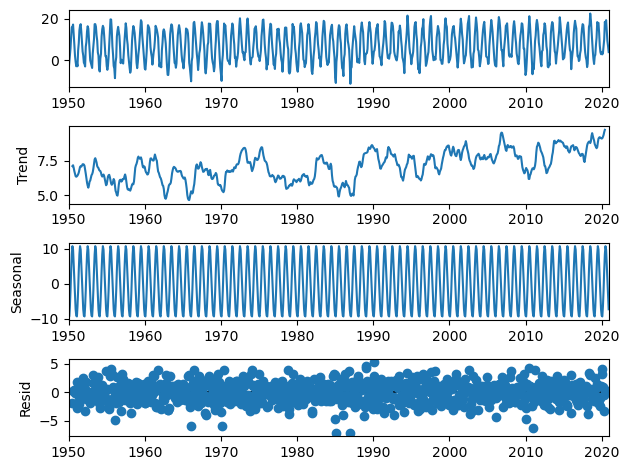

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(stockholm).plot();

The `auto_arima()` function from pmdarima allows for accounting for seasonality.

It will produce a SARIMA model, with terms that includes seasonal terms.

The first 3 terms are the same as for ARIMA. The next 4 terms new. Of those terms the first 3 are just seasonal versions of the ARIMA terms, and the fourth is the length of a season. For example, the seasonal AR terms will use values from 12 months ago to predict the next value. 

In [66]:
stock_model = auto_arima(stockholm, seasonal=True, m=12)
stock_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  852
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -1774.486
Date:                              Sun, 23 Apr 2023   AIC                           3564.972
Time:                                      14:49:17   BIC                           3602.952
Sample:                                  01-01-1950   HQIC                          3579.519
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0222      0.010      2.270      0.023       0.003       0.041
ar.L1         -0.4504      0.083     -5.444      0.000      -0.613      -0.288
ar.L2          0.4891      0.073      6.707      0.000       0.346       0.632
ma.L1          0.8308      0.090      9.260      0.000       0.655       1.007
ma.L2         -0.1517      0.085     -1.775      0.076      -0.319       0.016
ar.S.L12       0.9969      0.001    742.997      0.000       0.994       1.000
ma.S.L12      -0.8669      0.024    -36.695      0.000      -0.913      -0.821
sigma2         3.6371      0.168     21.690      0.000       3.308       3.966
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                25.70
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.26
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

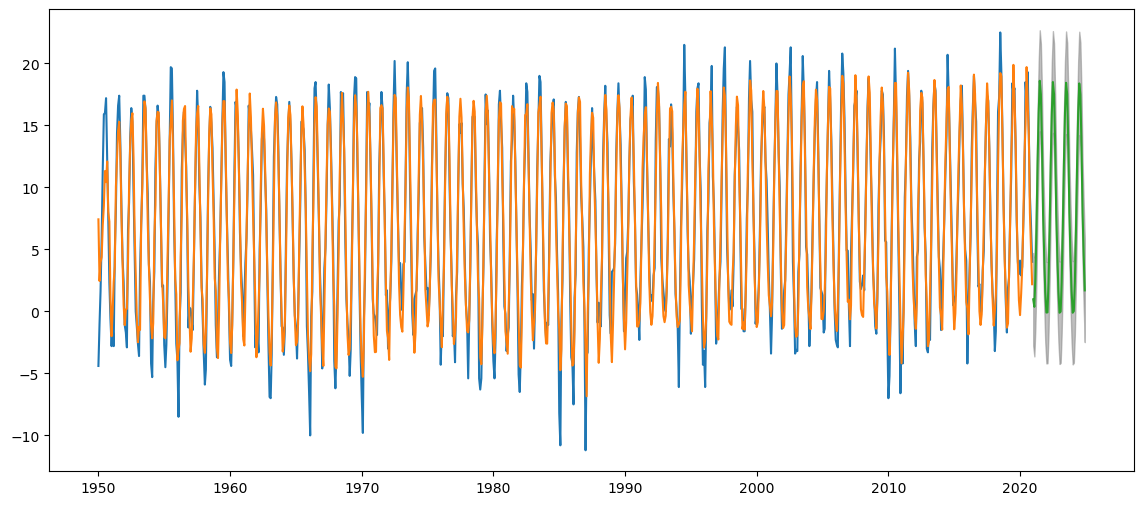

In [71]:
forecast, ci = stock_model.predict(48, return_conf_int=True)

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(stockholm)
ax.plot(stock_model.predict_in_sample())
ax.plot(forecast)
ax.fill_between(forecast.index, ci[:,0], ci[:,1], color = 'gray', alpha=0.5)
ax;